<a href="https://colab.research.google.com/github/iagam/Tensorflow/blob/master/NLP_Sarcasm_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
tf.__version__

'1.15.0'

In [0]:
import json

with open('/tmp/sarcasm.json',"r") as f:
    datastore = json.load(f)

In [0]:
sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    urls.append(item['article_link'])
    labels.append(item['is_sarcastic'])
print(len(sentences))

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Setting up the Hyperparameters**

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                                padding = padding_type, truncating = trunc_type)

In [14]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ["accuracy"])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_____________________

In [15]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs = num_epochs,
                    validation_data = (testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 5s - loss: 0.5742 - acc: 0.6981 - val_loss: 0.4015 - val_acc: 0.8310
Epoch 2/30
20000/20000 - 3s - loss: 0.3148 - acc: 0.8747 - val_loss: 0.3415 - val_acc: 0.8541
Epoch 3/30
20000/20000 - 3s - loss: 0.2367 - acc: 0.9080 - val_loss: 0.3403 - val_acc: 0.8556
Epoch 4/30
20000/20000 - 3s - loss: 0.1914 - acc: 0.9270 - val_loss: 0.3656 - val_acc: 0.8445
Epoch 5/30
20000/20000 - 3s - loss: 0.1593 - acc: 0.9418 - val_loss: 0.3880 - val_acc: 0.8518
Epoch 6/30
20000/20000 - 3s - loss: 0.1347 - acc: 0.9518 - val_loss: 0.4103 - val_acc: 0.8462
Epoch 7/30
20000/20000 - 3s - loss: 0.1175 - acc: 0.9603 - val_loss: 0.4421 - val_acc: 0.8433
Epoch 8/30
20000/20000 - 3s - loss: 0.1014 - acc: 0.9665 - val_loss: 0.4824 - val_acc: 0.8410
Epoch 9/30
20000/20000 - 3s - loss: 0.0881 - acc: 0.9721 - val_loss: 0.5269 - val_acc: 0.8334
Epoch 10/30
20000/20000 - 3s - loss: 0.0763 - acc: 0.9762 - val_loss: 0.5718 - val_acc: 0.8331
Epoch 11/3

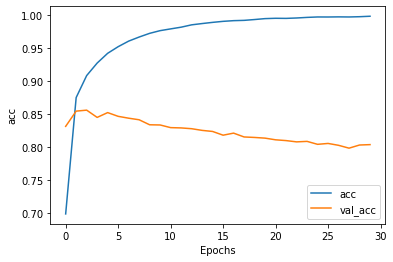

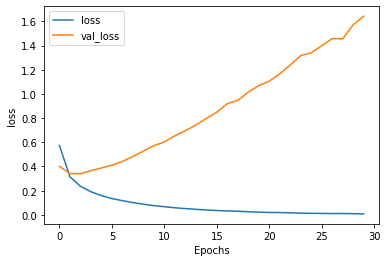

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string , 'val_'+string])
  plt.show()

plot_graphs(history,"acc")
plot_graphs(history,"loss")